# 1. Importation des bibliothèques nécessaires

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Chemin vers le dataset
data_path = '../data/raw/brain-tumor-mri-dataset/'

# 2. Exploration de la structure des données

In [5]:
classes = os.listdir(data_path)
print(f"Classes trouvées : {classes}")

Classes trouvées : ['pituitary', 'glioma', 'meningioma', 'notumor']


In [6]:
# Compter le nombre d'images dans chaque classe
class_counts = {cls: len(os.listdir(os.path.join(data_path, cls))) for cls in classes}

In [7]:
print("\nNombre d'images par classe :")
for cls, count in class_counts.items():
    print(f"{cls}: {count} images")


Nombre d'images par classe :
pituitary: 1757 images
glioma: 1621 images
meningioma: 1775 images
notumor: 2000 images


# 3. Identification des fichiers corrompus ou les anomalies.

Vérifiez si toutes les images peuvent être ouvertes.

In [13]:
invalid_files = []
for cls in classes:
    for img_name in os.listdir(os.path.join(data_path, cls)):
        try:
            img_path = os.path.join(data_path, cls, img_name)
            with Image.open(img_path) as img:
                img.verify()  # Vérification du fichier
        except Exception as e:
            invalid_files.append(img_path)
            print(f"Erreur avec l'image {img_name}: {e}")

print("Fichiers corrompus ou invalides :", invalid_files)

Erreur avec l'image test.jpg: cannot identify image file '../data/raw/brain-tumor-mri-dataset/glioma/test.jpg'
Fichiers corrompus ou invalides : ['../data/raw/brain-tumor-mri-dataset/glioma/test.jpg']


# 4. Affichage des images pour chaque classe

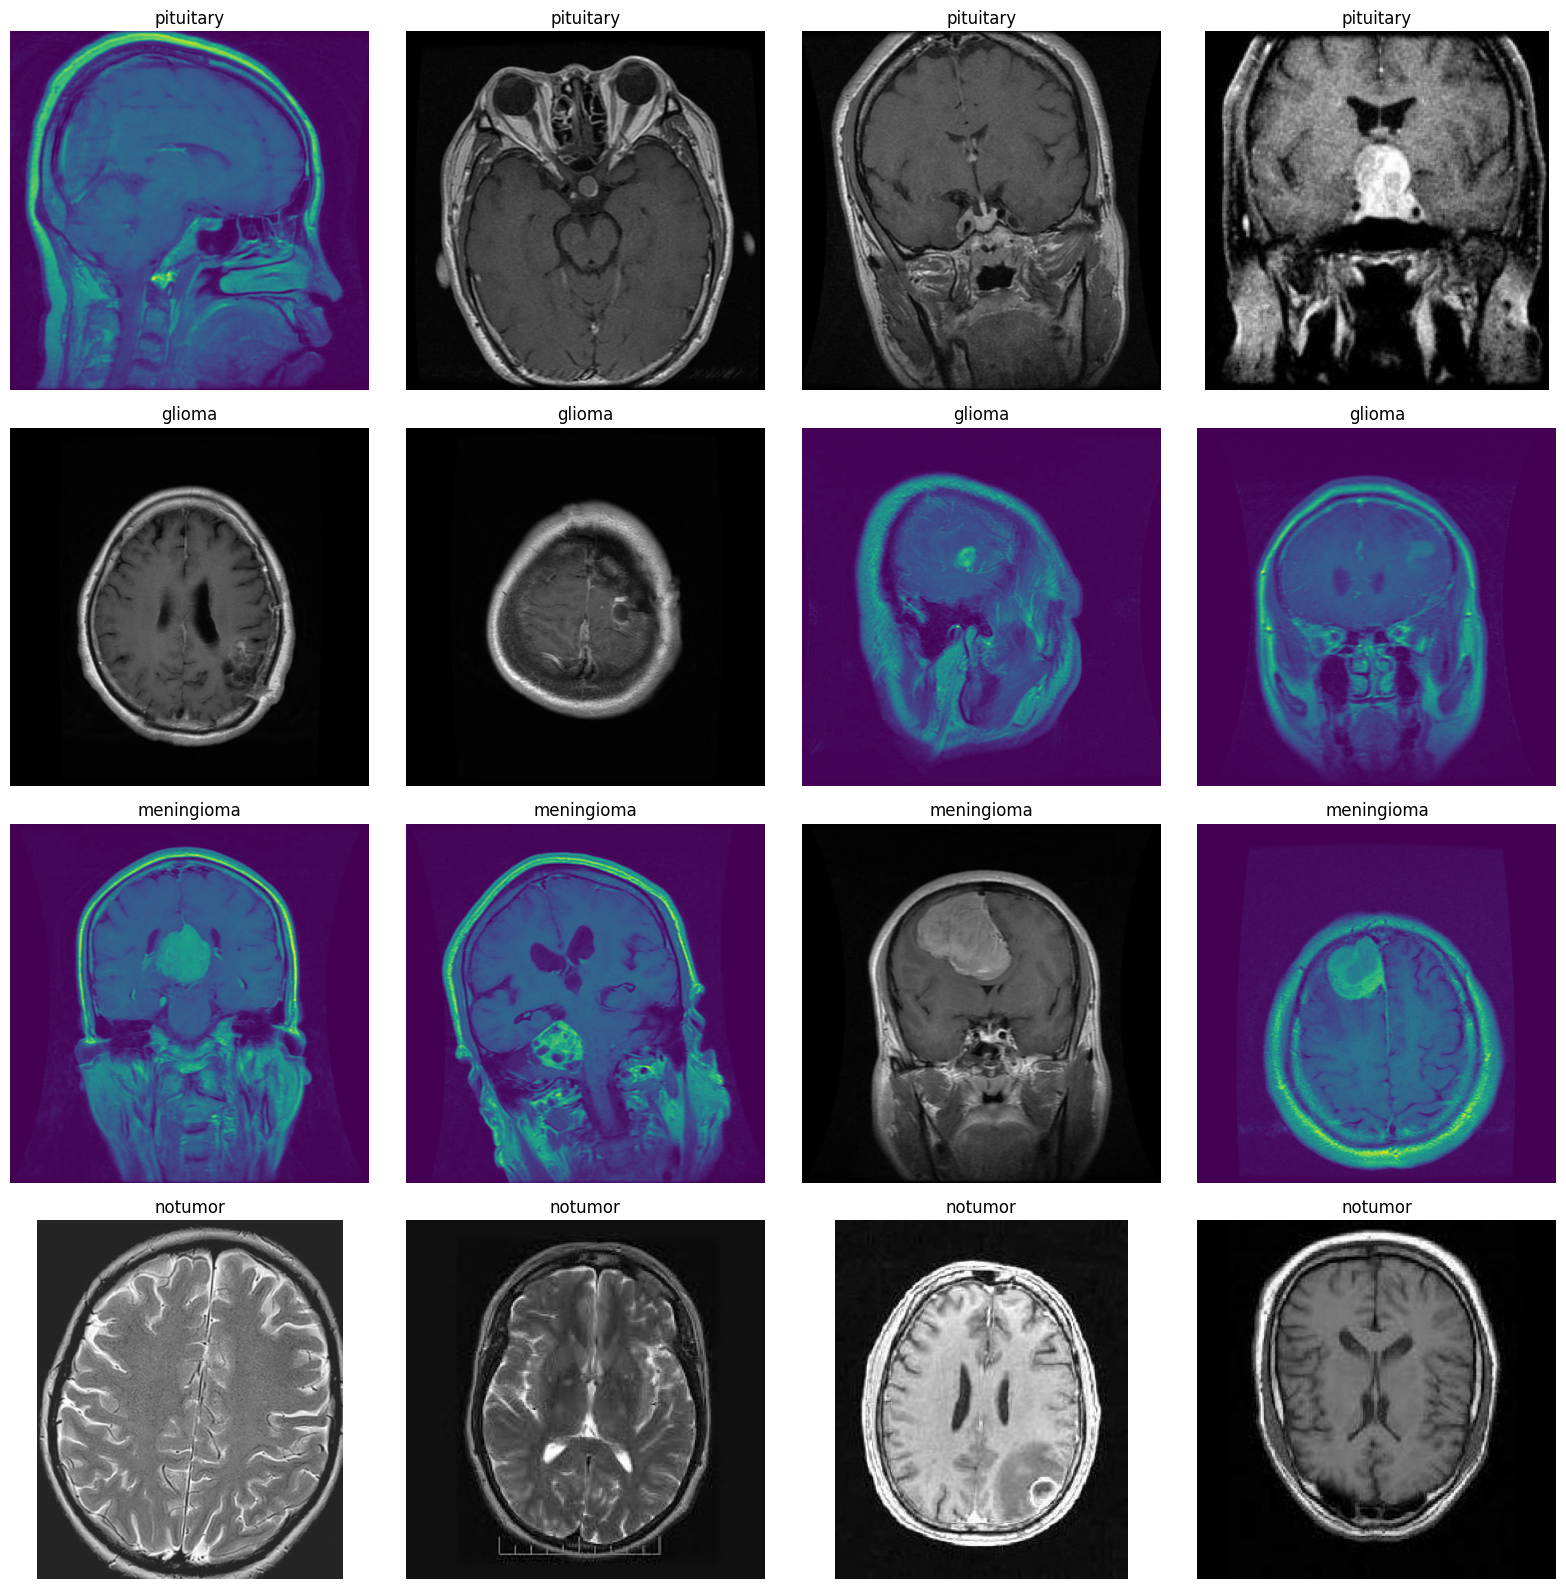

In [8]:
def afficher_exemples_images(data_path, classes, n=4):
    plt.figure(figsize=(16, len(classes) * 4))
    for i, cls in enumerate(classes):
        images = os.listdir(os.path.join(data_path, cls))[:n]
        for j, img_name in enumerate(images):
            img_path = os.path.join(data_path, cls, img_name)
            img = Image.open(img_path)
            plt.subplot(len(classes), n, i * n + j + 1)
            plt.imshow(img)
            plt.title(cls)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

afficher_exemples_images(data_path, classes)

# 5. Statistiques des dimensions des images

In [9]:
dimensions = []
for cls in classes:
    for img_name in os.listdir(os.path.join(data_path, cls)):
        try:
            with Image.open(os.path.join(data_path, cls, img_name)) as img:
                dimensions.append(img.size)
        except Exception as e:
            print(f"Erreur avec l'image {img_name}: {e}")

dim_df = pd.DataFrame(dimensions, columns=["Largeur", "Hauteur"])
print("\nStatistiques des dimensions des images :")
print(dim_df.describe())


Statistiques des dimensions des images :
           Largeur      Hauteur
count  7153.000000  7153.000000
mean    446.641968   449.038585
std     131.694857   125.674042
min     150.000000   168.000000
25%     400.000000   417.000000
50%     512.000000   512.000000
75%     512.000000   512.000000
max    1920.000000  1446.000000


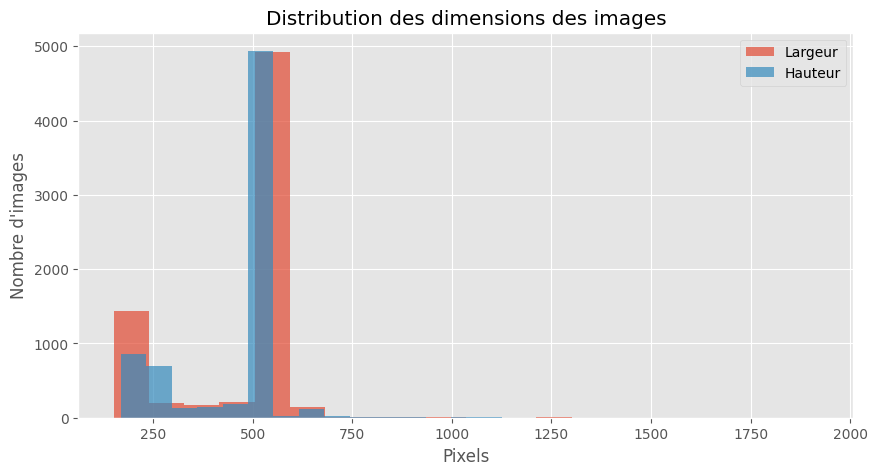

In [57]:
# Distribution des dimensions
plt.figure(figsize=(10, 5))
plt.hist(dim_df['Largeur'], bins=20, alpha=0.7, label="Largeur")
plt.hist(dim_df['Hauteur'], bins=20, alpha=0.7, label="Hauteur")
plt.legend()
plt.title("Distribution des dimensions des images")
plt.xlabel("Pixels")
plt.ylabel("Nombre d'images")
plt.show()

# 6. Distribution des classes

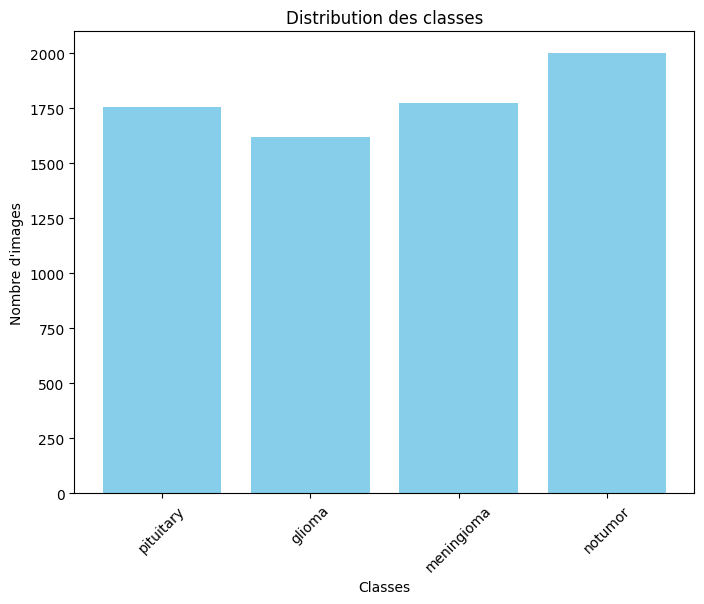

In [10]:
plt.figure(figsize=(8, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("Distribution des classes")
plt.xlabel("Classes")
plt.ylabel("Nombre d'images")
plt.xticks(rotation=45)
plt.show()